In [2]:
# Initialisation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn.datasets as sk_iris_dataset
import math

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


best vector = [[0.26930587]
 [2.21979151]] 
fisher ratio = [[1.95041352e+14]]


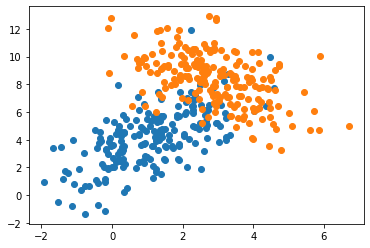

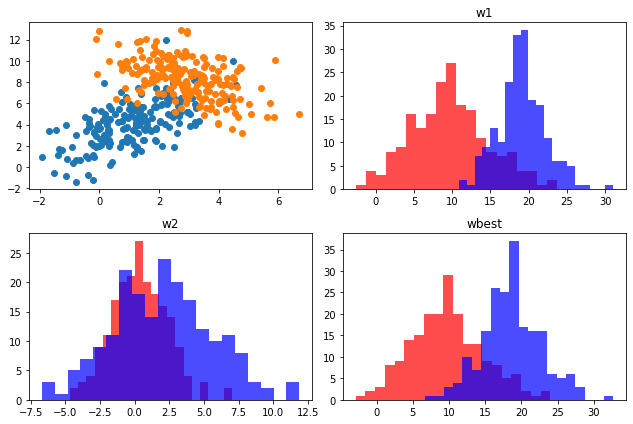

In [ ]:
# showcase
Ma , Mb = np.array([ 1, 4]) , np.array([ 3, 8])
Sa , Sb = np.array([[1,4],[2,3]]) , np.array([[1,0],[2,-4]])
Na , Nb = 200,200
x1a, x2a = np.random.multivariate_normal(Ma,Sa,Na).T
x1b, x2b = np.random.multivariate_normal(Mb,Sb,Nb).T
plt.scatter(x1a,x2a)
plt.scatter(x1b,x2b)
# choice for w+ and w- 
xa = np.random.multivariate_normal(Ma,Sa,Na).T
xb = np.random.multivariate_normal(Mb,Sb,Nb).T
w1, w2 = np.array([1,2]) , np.array([2,-0.5])
y1a = np.matmul(w1,xa)
y1b = np.matmul(w1,xb)
y2a = np.matmul(w2,xa)
y2b = np.matmul(w2,xb)


# redefine Mean and wn in matrix

Ma , Mb = np.array([ [1], [4] ]) , np.array([ [3], [8] ])
w1, w2 = np.array([[1],[2]]) , np.array([[2],[-0.5]])


########### 3.1c #########

#to find best direction, set gradient to 0
# J(w)= w.T*(ma-mb)*(ma-mb).T*w
#    -------------------------
#    w.T*(na*Sa+nb*Sb)*w
def R(deta):
  result = [ [math.cos(deta) ,-math.sin(deta) ],
        [math.sin(deta), math.cos(deta) ]]
  return result
def Fisher_score(w,ma,mb,sa,sb,na,nb):
  return np.matmul(np.matmul(np.matmul(w.T,(ma-mb)),(ma-mb).T),w)/np.matmul(np.matmul(w.T,(na*sa+nb*sb)),w)
def maxargw(w0,iter,learning_rate):
  wn = np.matmul(R(0*math.pi/180),w0)
  a = Fisher_score(wn,Ma,Mb,Sa,Sb,Na,Nb)
  for i in range(iter):
    wn = np.matmul(R( (learning_rate/a) *math.pi/180),wn)
    a = Fisher_score(wn,Ma,Mb,Sa,Sb,Na,Nb)
  return wn,a


# plot w best on axes No.4
wbest , fisher_ratio = maxargw(w1,1000,0.1)
print( 'best vector =',wbest ,'\nfisher ratio =',fisher_ratio )
#print(Fisher_score(np.array([[-1.01455822],[-1.99265442]]),Ma,Mb,Sa,Sb,200,200))
#print(xa)
ybesta = np.matmul(wbest.T,xa).T
ybestb = np.matmul(wbest.T,xb).T

# data illustration
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(9,6))
ax0.scatter(x1a,x2a)
ax0.scatter(x1b,x2b)
ax1.hist(y1a, bins = 20 ,alpha= 0.7 ,label='class a',color = 'red')
ax1.hist(y1b, bins = 20 ,alpha= 0.7 ,label='class b',color = 'blue')
ax1.set_title('w1')
ax2.hist(y2a, bins = 20 ,alpha= 0.7 ,label='class a',color = 'red')
ax2.hist(y2b, bins = 20 ,alpha= 0.7 ,label='class b',color = 'blue')
ax2.set_title('w2')
ax3.set_title('wbest')
ax3.hist(ybesta, bins = 20 ,alpha= 0.7 ,label='class a',color = 'red')
ax3.hist(ybestb, bins = 20 ,alpha= 0.7 ,label='class b',color = 'blue')
fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: covariance is not positive-semidefinite.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: covariance is not positive-semidefinite.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


Mean of A = 
 [[1.22747098]
 [4.23120835]] 
Mean of B = 
 [[3.01942999]
 [8.03859715]]
Covariance of A =
 [[1.34315804 1.25731481]
 [1.25731481 4.75514303]]
Covariance of B =
 [[ 2.02025089 -1.93259038]
 [-1.93259038  3.83875555]]
[[5.29984707]]


Text(0.5, 1.0, 'Sa=Sb')

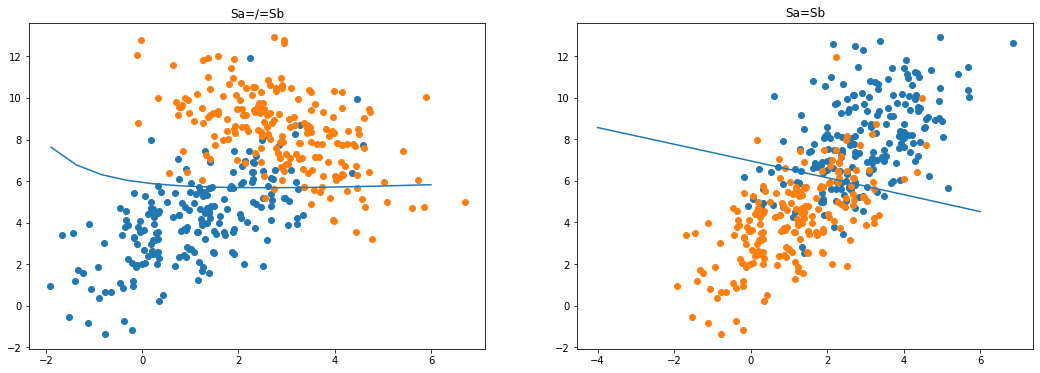

In [ ]:
################# 3.1.2 ##################
def mean(x,n):
  xn1 = 0
  xn2 = 0
  for i in range(n):
    xn1 += x[0][i]
    xn2 += x[1][i]
  xsum = np.array([[xn1],[xn2]])
  return (1/n)*xsum
def covariance(x,n):
  xdiff = x - mean(x,n)
  return (1/n)*np.matmul(xdiff,xdiff.T)
meanA = mean(xa,200)
covarA = covariance(xa,200)
meanB = mean(xb,200)
covarB = covariance(xb,200)
Mc = np.array([ 3, 8])
xc = np.random.multivariate_normal(Mc,Sa,Na).T       #### we make X class c same covariance as X class a
x1c, x2c = np.random.multivariate_normal(Mc,Sa,Na).T
meanC = mean(xc,200)
covarC = covariance(xc,200)
print('Mean of A = \n',meanA,'\nMean of B = \n',meanB)
print('Covariance of A =\n',covarA)
print('Covariance of B =\n',covarB)
def log_odd(x,m1,m2,covar1,covar2):  # entry of x is 2x1 matrix
  return np.log(np.linalg.det(np.linalg.inv(covar1))/np.linalg.det(np.linalg.inv(covar2)))+\
      0.5*np.matmul(np.matmul((x-m2).T,covar2),(x-m2)) - 0.5*np.matmul(np.matmul((x-m1).T,covar1),(x-m1))
#  ln(odd)= ln(P(c = a|xn)) = ln(|A+|/|A-|)+1/2(x-u-)T*A-(x-u-)-1/2(x-u+)T*A+(x-u+)
#        (P(c = b|xn))
def make_decision_boundary(xaxis,m1,m2,covar1,covar2,iter,scale):
  loop = iter    ## best loops = 100    ## best scale = 20
  yaxis = np.zeros(len(xaxis))
  for i in range(len(xaxis)):
    a = log_odd(np.array([[xaxis[i]],[0]]),m1,m2,covar1,covar2)
    y = 0
    for j in range(loop):
      y = y + a/scale
      a = log_odd(np.array([[xaxis[i]],[y]]),m1,m2,covar1,covar2)
    yaxis[i] = y
    y = 0
  return yaxis
xline1 = np.linspace(-4,6,20)
print(log_odd(np.array([[-2.42105263],[7.48597459]]),meanA,meanB,covarA,covarB))
yline1 = make_decision_boundary(xline1,meanA,meanB,covarA,covarB,100,20)
#print(xline)
#print(yline)
xline2 = np.linspace(-4,6,20)
yline2 = make_decision_boundary(xline2,meanA,meanC,covarA,covarC,100,20)
#  Decision Boundary, it is perpendicular to the best vector found
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax0.scatter(x1a,x2a)
ax0.scatter(x1b,x2b)
ax0.plot(xline1,yline1)
ax0.set_title('Sa=/=Sb')
ax1.scatter(x1c,x2c)
ax1.scatter(x1a,x2a)
ax1.plot(xline2,yline2)
ax1.set_title('Sa=Sb')

In [ ]:
###########   3.2   ############  
from sklearn.datasets import load_iris
from scipy.linalg import eigh
def mean(x,y,n,c):   # c represent class, to return which mean for a class
  xn1 = 0
  xn2 = 0
  xn3 = 0
  xn4 = 0
  flag = 0
  for i in range(n):
    if (y[i]==c):
      xn1 += x[i][0]
      xn2 += x[i][1]
      xn3 += x[i][2]
      xn4 += x[i][3]
      flag += 1
  xsum = np.array([[xn1],[xn2],[xn3],[xn4]])
  return (1/flag)*xsum
def covariance(x,y,n,c):
  flag = 0
  covar = np.zeros((x.shape[1],x.shape[1]))
  for i in range(n):
    if (y[i]==c):
      flag+=1
      xdiff = x[i] - mean(x,y,n,c).T
      covar += (1/flag)*np.matmul(xdiff.T,xdiff)
      #print(covar)
  return covar
iris = load_iris()
x=iris.data
y=iris.target
#print(x)
print('mean class A: ',mean(x,y,x.shape[0],0))
print('covar class A: ',covariance(x,y,x.shape[0],0))
#print(np.matmul((x.T-mean(x,y,x.shape[0],0)),(x.T-mean(x,y,x.shape[0],0)).T))
# Use this formula toA obtain eigenvalues: vector of best fit
# AW = lamdaBW wheree A is between class covar, B is within class covar
# let w = [[1,2,3,1]]
def getlampda(x,y):
  classnum = x.shape[1]-1
  A = np.zeros((x.shape[1],x.shape[1]))
  B = np.zeros((x.shape[1],x.shape[1]))
  for c in range(classnum):
    A += np.matmul((x.T-mean(x,y,x.shape[0],c)),(x.T-mean(x,y,x.shape[0],c)).T)
    B += covariance(x,y,x.shape[0],c)
  A = A*50/x.shape[0]
  evalue, evector = eigh(A,B)
  return evalue, evector
eighvalue, eighvector = getlampda(x,y)
print('eigenvalue 1:',eighvalue[0], ' ,  eigenvalue 2:',eighvalue[1],'\neigenvalue 3:',eighvalue[2],' ,  eigenvalue 4:',eighvalue[3])
print('eigenvector :',eighvector)
########### cannot finish

mean class A:  [[5.006]
 [3.428]
 [1.462]
 [0.246]]
covar class A:  [[0.41761979 0.34410876 0.05834147 0.04140053]
 [0.34410876 0.47236727 0.04682792 0.05214971]
 [0.05834147 0.04682792 0.08310122 0.02189596]
 [0.04140053 0.05214971 0.02189596 0.03022994]]
[  8.02531073  16.17457675  21.84599611 887.91466644]
eigenvalue 1: 8.025310728607845  ,  eigenvalue 2: 16.174576746662012 
eigenvalue 3: 21.845996105241483  ,  eigenvalue 4: 887.9146664421178
eigenvector : [[ 0.61402957  0.3793185   0.5385941   0.03801805]
 [-0.17374268 -0.9759217  -0.36849678  0.73824472]
 [-0.1710967  -0.40785867 -1.06289664 -0.56233488]
 [-0.20069621  0.30576266  1.90284667 -0.82843094]]


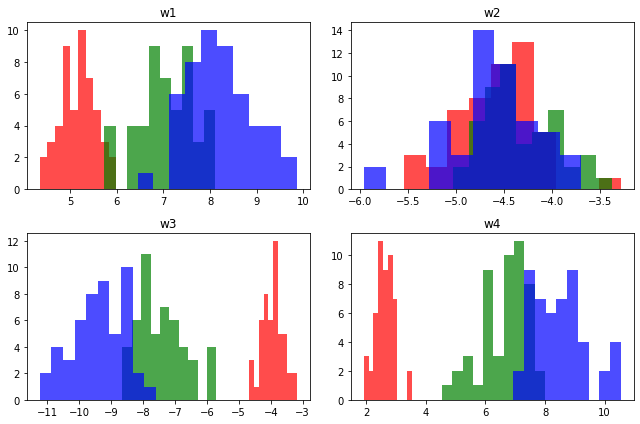

In [ ]:
###### 3.2.2 #######
def class_splitter(x,y):
  xc1 = []
  xc2 = []
  xc3 = []
  for n in range(x.shape[0]):
    if (y[n]==0):
      xc1.append([x[n]])
    if (y[n]==1):
      xc2.append([x[n]])
    if (y[n]==2):
      xc3.append([x[n]])
  return xc1,xc2,xc3
xa,xb,xc = class_splitter(x,y)
y1a,y1b,y1c = np.matmul(xa,eighvector[0]),np.matmul(xb,eighvector[0]),np.matmul(xc,eighvector[0])
y2a,y2b,y2c = np.matmul(xa,eighvector[1]),np.matmul(xb,eighvector[1]),np.matmul(xc,eighvector[1])
y3a,y3b,y3c = np.matmul(xa,eighvector[2]),np.matmul(xb,eighvector[2]),np.matmul(xc,eighvector[2])
y4a,y4b,y4c = np.matmul(xa,eighvector[3]),np.matmul(xb,eighvector[3]),np.matmul(xc,eighvector[3])
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(9,6))
ax0.hist(y1a, bins = 10 ,alpha= 0.7 ,label='class a',color = 'red')
ax0.hist(y1b, bins = 10 ,alpha= 0.7 ,label='class b',color = 'green')
ax0.hist(y1c, bins = 10 ,alpha= 0.7 ,label='class c',color = 'blue')
ax0.set_title('w1')
ax1.hist(y2a, bins = 10 ,alpha= 0.7 ,label='class a',color = 'red')
ax1.hist(y2b, bins = 10 ,alpha= 0.7 ,label='class b',color = 'green')
ax1.hist(y2c, bins = 10 ,alpha= 0.7 ,label='class c',color = 'blue')
ax1.set_title('w2')
ax2.hist(y3a, bins = 10 ,alpha= 0.7 ,label='class a',color = 'red')
ax2.hist(y3b, bins = 10 ,alpha= 0.7 ,label='class b',color = 'green')
ax2.hist(y3c, bins = 10 ,alpha= 0.7 ,label='class c',color = 'blue')
ax2.set_title('w3')
ax3.hist(y4a, bins = 10 ,alpha= 0.7 ,label='class a',color = 'red')
ax3.hist(y4b, bins = 10 ,alpha= 0.7 ,label='class b',color = 'green')
ax3.hist(y4c, bins = 10 ,alpha= 0.7 ,label='class c',color = 'blue')
ax3.set_title('w4')
fig.tight_layout()

[[-0.984347   -1.3126185  -0.43306455  0.9118554 ]
 [ 1.0136408   0.9227065  -3.4108253  -0.15374973]
 [-0.11901228  0.14596127  0.06521642 -1.619525  ]
 [-2.0058527  -0.97301817  2.3088892   0.8492592 ]]
[[0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.9 0.1 0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.9 0.1 0. ]
 [0.  0.9 0.1 0. ]
 [0.  1.  0.  0. ]
 [0.  0.9 0.1 0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.9 0.1 0. ]
 [0.  0.9 0.1 0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.9 0.1 0. ]
 [0.  0.9 0.1 0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.9 0.1 0.

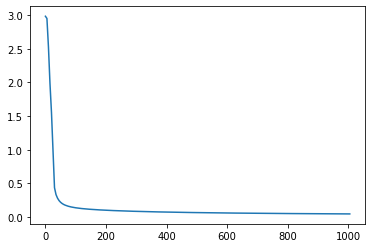

In [ ]:
###### 3.2.3 ##########....[3]
import jax.numpy as jnp
from jax import grad
from jax import random

######## by using softmax regression algorithm learnt in Lab 2 ##########
def softmax_prob(w, x): 
    datalen = jnp.shape(x.T)[1]
    c = len(w)-1
    #x = jnp.concatenate((jnp.ones((1,datalen)), x), axis=0)
    score = jnp.dot(w,x.T)
    high = jnp.max(score, axis=0)
    high_offset = jnp.dot(np.ones((c+1, datalen)),jnp.diag(high)) #  (C-by-L)*(L-by-L)    
    expscore = jnp.exp(score - high_offset)
    norm_factor = jnp.diag(1/jnp.sum(expscore, axis=0))
    return jnp.dot(expscore, norm_factor).T  
def softmax_entropy(wb, x, y, n):
    epsilon = 1e-8
    ys = get_one_hot(y, n)
    logprobs = -jnp.log(softmax_prob(wb, x)+epsilon)
    return jnp.mean(ys*logprobs)
def get_one_hot(y, class_num):
    res = jnp.eye(class_num)[jnp.array(y).reshape(-1)]
    return jnp.concatenate((jnp.zeros((len(y),1)),res),axis=1)
def grad_descent(wrand, x, y, class_num,  lrate, iters):
    w1 = wrand
    whist = [w1]
    losshist = [softmax_entropy(w1, x, y, class_num )]
    for i in range(iters):
        gradw = grad(softmax_entropy, (0))(w1, x, y, class_num)
        w1 = w1 - lrate*gradw
        if (i%5 ==0):
            whist.append(w1)
            losshist.append(softmax_entropy(w1, x, y, class_num))
    whist.append(w1)
    losshist.append(softmax_entropy(w1, x, y, class_num))    
    return w1, whist, losshist
### initialise a dummy w,
# Initialize random model coefficients
seed = random.PRNGKey(5)
seed, w_seed= random.split(seed, 2)
winitial = random.normal(w_seed, (4,4))
wbest, whist, losshist = grad_descent(winitial,x,y,3,0.2,1000)  ## best rate at 0.2, iterations=1000
plt.plot([5*i for i in range(len(losshist))], losshist)
print(wbest)
print(np.around(softmax_prob(wbest, x),1))

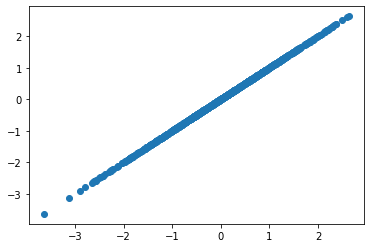

In [15]:
Mean = np.array([ 0, 0])
Covar = np.array([[0.5,1],[1,1]])
x1, x2 = np.random.multivariate_normal(Mean,Covar,1000).T
plt.scatter(x1,x2)